In [1]:
from google.colab import files
uploaded=files.upload()

Saving salary_prediction_data.csv to salary_prediction_data.csv


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("salary_prediction_data.csv")

In [4]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [5]:
data.shape

(1000, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [7]:
data.describe(include='all')

,Education,Experience,Location,Job_Title,Age,Gender,Salary
count,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000
unique,4,NaN,3,4,NaN,2,NaN
top,High School,NaN,Suburban,Director,NaN,Male,NaN
freq,255,NaN,345,275,NaN,516,NaN
mean,NaN,14.771000,NaN,NaN,42.377000,NaN,105558.404239
std,NaN,8.341111,NaN,NaN,13.609412,NaN,28256.972075
min,NaN,1.000000,NaN,NaN,20.000000,NaN,33510.510669
25%,NaN,7.000000,NaN,NaN,30.000000,NaN,85032.141517
50%,NaN,15.000000,NaN,NaN,43.000000,NaN,104314.518315
75%,NaN,22.000000,NaN,NaN,55.000000,NaN,126804.047524


In [8]:
data.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [9]:
data.duplicated().any()


False

<Axes: xlabel='Education'>

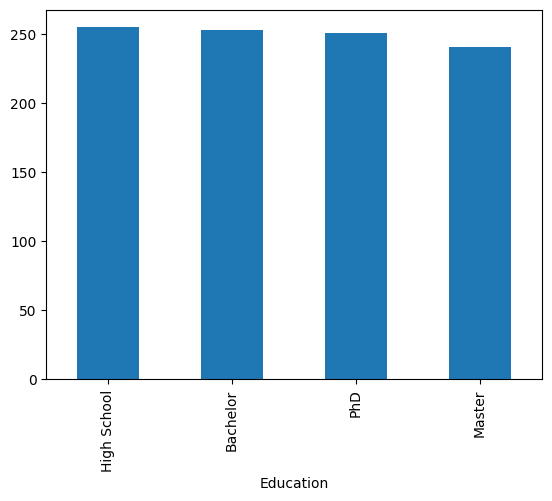

In [10]:
data['Education'].value_counts().plot(kind="bar")

In [13]:
data["Education"]=LabelEncoder().fit_transform(data['Education'])

In [14]:
data['Gender'].replace({"Male":1,"Female":0},inplace=True)


<ipython-input-14-40d36f783a45>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({"Male":1,"Female":0},inplace=True)
<ipython-input-14-40d36f783a45>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'].replace({"Male":1,"Female":0},inplace=True)


In [15]:
data["Job_Title"].unique()


array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [16]:
data["Job_Title"]=LabelEncoder().fit_transform(data["Job_Title"])

In [17]:
data["Location"]=data["Location"].map({"Urban":1,"Suburban":2,"Rural":0})

In [18]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,1,3,63,1,84620.053665
1,3,11,2,1,59,1,142591.255894
2,0,28,2,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,1,0,26,0,132157.786175


<ipython-input-19-bd31ccb3df31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


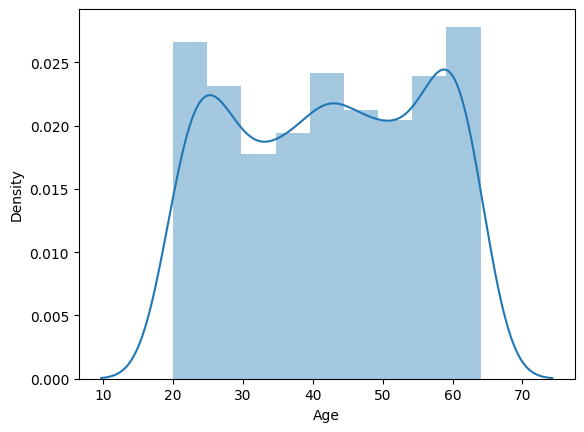

In [19]:
sns.distplot(data["Age"])
plt.show()

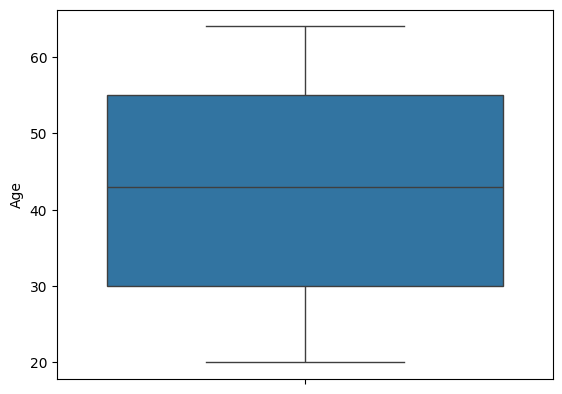

In [20]:
sns.boxplot(data["Age"])
plt.show()

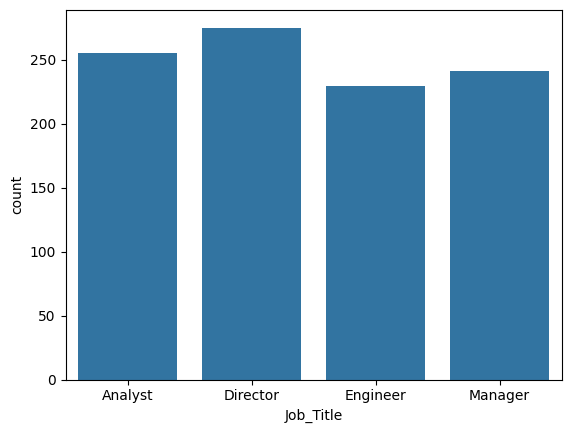

In [21]:
sns.countplot(x=data['Job_Title'])
plt.xticks([0,1,2,3],['Analyst','Director','Engineer','Manager'])
plt.show()

In [23]:
data.head(2)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,1,3,63,1,84620.053665
1,3,11,2,1,59,1,142591.255894


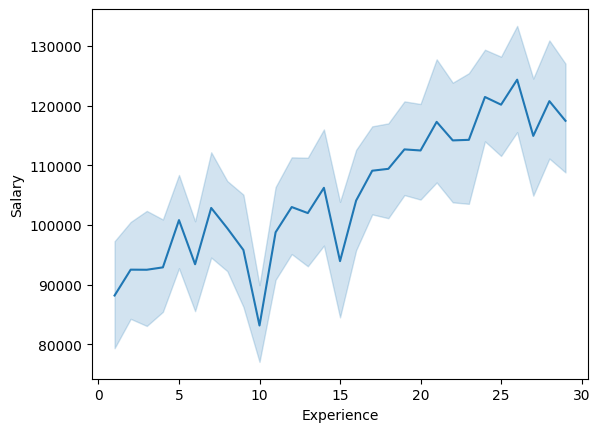

In [24]:
sns.lineplot(x=data['Experience'],y=data['Salary'])
plt.show()

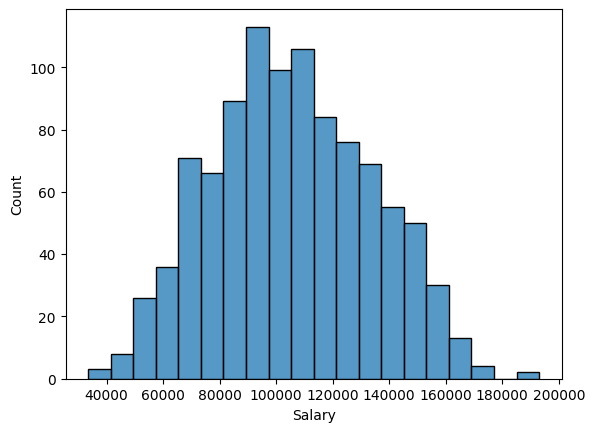

In [25]:
sns.histplot(data['Salary'])
plt.show()

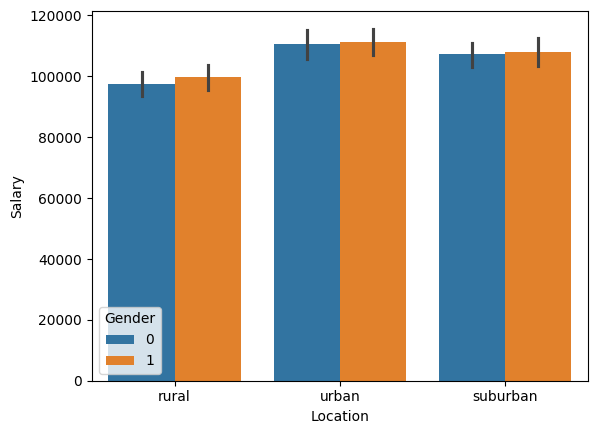

In [26]:
sns.barplot(x=data['Location'],y=data['Salary'],hue=data['Gender'])
plt.xticks([0,1,2],['rural','urban','suburban'])
plt.show()


<ipython-input-27-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

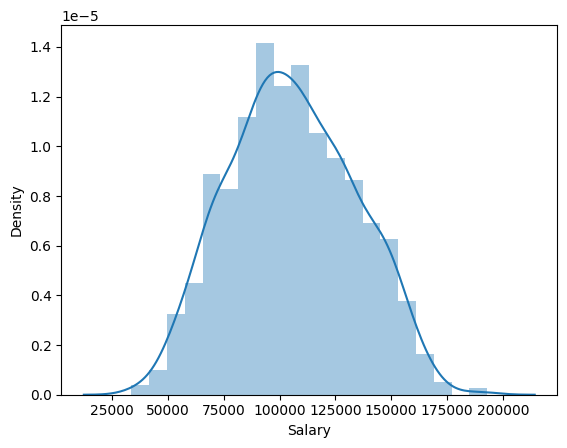

In [27]:
sns.distplot(data['Salary'])

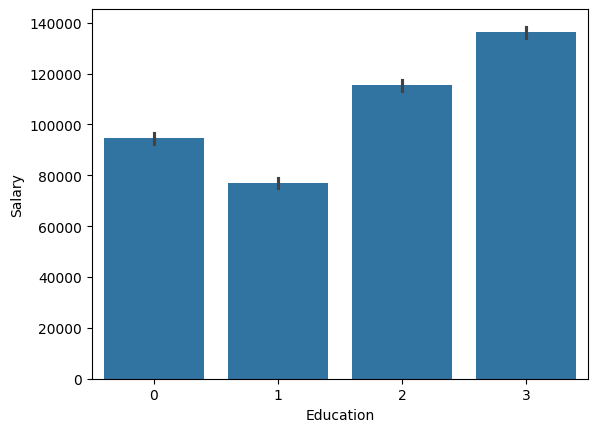

In [28]:
sns.barplot(x=data['Education'],y=data['Salary'])
plt.show()

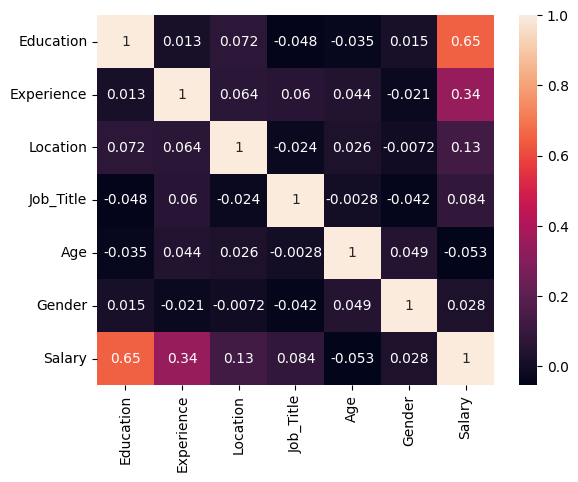

In [29]:
sns.heatmap(data.corr(),annot=True,fmt=".2g")
plt.show()

In [30]:
x=data.drop(['Salary'],axis=1)
y=data['Salary']

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
adb_model=AdaBoostRegressor(n_estimators=125)
gb_model=GradientBoostingRegressor(n_estimators=125,max_depth=6)

In [36]:
adb_model.fit(x_train,y_train)
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=125)

In [37]:
ypred1=adb_model.predict(x_test)
ypred2=gb_model.predict(x_test)

In [38]:
score1=r2_score(ypred1,y_test)
score2=r2_score(ypred2,y_test)

In [39]:
df=pd.DataFrame({'model':['adaboostregressor','gbregressor'],'r2_score':[score1,score2]})

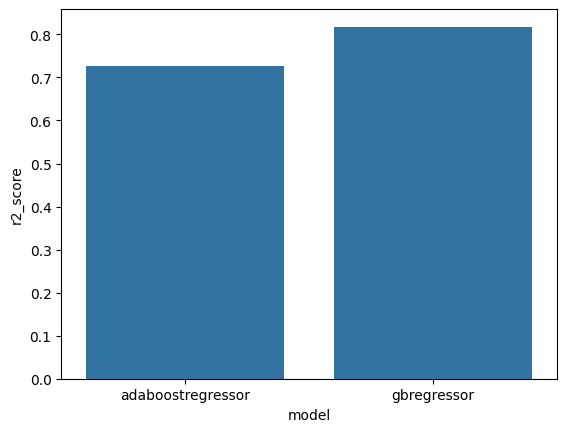

In [41]:
sns.barplot(x=df['model'],y=df['r2_score'])
plt.show()